In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 連続確率分布
*   一様分布
*   ガンマ分布
*   ベータ分布
*   ディリクレ分布
*   (単一)ガウス分布


## 連続確率分布

### 一様分布

区間 [$\alpha$, $\beta$] を指定する。

利用法
*   SciPy:	scipy.stats.uniform($\alpha$, $\beta$)
*   NumPy:	np.random.uniform($\alpha$, $\beta$)
*   Stan:	uniform($\alpha$, $\beta$)

In [25]:
from scipy.stats import uniform

(array([0.91034749, 0.92035131, 1.01038568, 0.95036277, 1.07040859,
        1.00038186, 1.19045441, 0.91034749, 1.00038186, 1.04039714]),
 array([3.67919007e-04, 1.00329748e-01, 2.00291576e-01, 3.00253405e-01,
        4.00215233e-01, 5.00177062e-01, 6.00138890e-01, 7.00100719e-01,
        8.00062547e-01, 9.00024376e-01, 9.99986204e-01]),
 <a list of 10 Patch objects>)

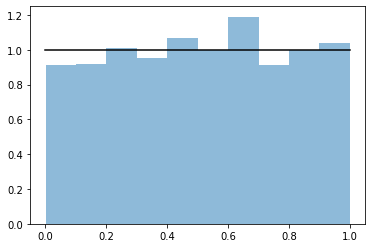

In [26]:
p = uniform(0, 1)

x = np.linspace(0, 1, 100)
plt.plot(x, p.pdf(x), color="black")
plt.hist(p.rvs(1000), density=True, alpha=0.5) # densityオプションで確率に変更できる

### ガンマ分布


$ \displaystyle
P(x|\alpha, \beta) = \frac{\beta^\alpha x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}
$

もしくは、

$ \displaystyle
P(x|\alpha, \theta) = \frac{x^{\alpha-1}e^{-\frac{x}{\theta}}}{\Gamma(\alpha)\theta^\alpha }
$

利用法
*   SciPy:	scipy.stats.gamma($\alpha$, loc=0, scale=$1/\beta$)
*   NumPy:	np.random.gamma($\alpha$, $1/\beta$)
*   Stan:	gamma($\alpha$, $\beta$)

In [6]:
from scipy.stats import gamma

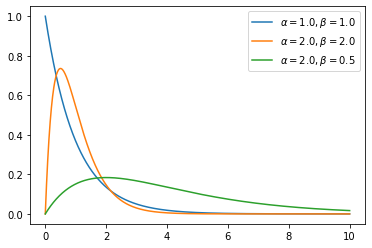

In [43]:
# 教科書教科書 2.3.3節 ガンマ分布 図2.9の再現
n = 1000
_alpha_list = [1.0, 2.0, 2.0]
_beta_list  = [1.0, 2.0, 0.5]

x = np.linspace(0,10,n)
for _alpha, _beta in zip(_alpha_list, _beta_list):
    y = gamma.pdf(x,_alpha,scale=1/_beta)
    plt.plot(x,y,label="$\\alpha = {}, \\beta = {}$".format(_alpha, _beta))

plt.legend()

(array([3.072e+03, 3.820e+03, 1.958e+03, 7.700e+02, 2.710e+02, 7.100e+01,
        2.500e+01, 1.100e+01, 1.000e+00, 1.000e+00]),
 array([ 0.52569923,  2.01093777,  3.49617632,  4.98141486,  6.46665341,
         7.95189195,  9.4371305 , 10.92236904, 12.40760759, 13.89284613,
        15.37808468]),
 <a list of 10 Patch objects>)

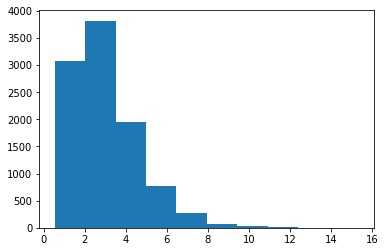

In [44]:
# 同様に、サンプリングを行い、ヒストグラムを作成し、上記の確率密度関数が正しいことを確認します。
# 𝛼=2.0,𝛽=2.5 のヒストグラムを作成します。

_alpha = 2.0
_alpha = 2.5


plt.hist(gamma.rvs(_alpha, _beta, size=10000), bins=10)

### ベータ分布


$ \displaystyle
Beta(\mu | a, b ) = C_B (a,b) \mu^{a-1}(1-\mu)^{b-1} 
$

$ \displaystyle
C_B(a,b) = \frac{\Gamma(a+b)}{\Gamma(a) \Gamma(b)}
$

確率変数 $\mu$ は $\mu \in [0,1]$ で、$a$, $b$, はともに正の実数、$\Gamma(.)$はガンマ関数で、$C_B(a,b)$ は値が0と1の間に入るよう正規化を担っている。

In [45]:
from scipy.stats import beta

# 確率密度関数は PDF
# - pdf : probability density function 確率密度関数 

In [28]:
beta?

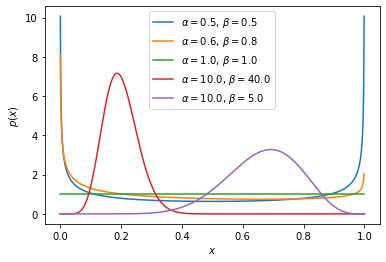

In [41]:
# 教科書 2.3.1 ベータ関数 図2.7の再現
n = 1000
alpha_list = [0.5, 0.6, 1.0, 10.0, 10.0]
beta_list  = [0.5, 0.8, 1.0, 40.0,  5.0]

x = np.linspace(0, 1, n)
for _alpha,_beta in zip(alpha_list, beta_list):
    y = beta.pdf(x, _alpha, _beta)
    plt.plot(x,y,label="$\\alpha=$" + str(_alpha) + ", $\\beta=$" + str(_beta))

plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend()

(array([0.41875691, 0.78516922, 1.24580182, 1.45518028, 1.44471136,
        1.3714289 , 1.3295532 , 1.30861536, 0.75376245, 0.35594338]),
 array([0.01695633, 0.11247714, 0.20799795, 0.30351876, 0.39903957,
        0.49456038, 0.59008119, 0.685602  , 0.78112281, 0.87664362,
        0.97216443]),
 <a list of 10 Patch objects>)

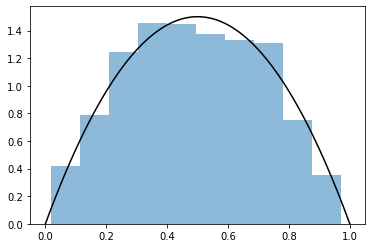

In [13]:
# 𝛼=2,𝛽=2 のベータ関数に対してサンプリングを行いヒストグラム表示して、確率密度関数が確かに正しいことを確認します。
# 上記の 𝛼=2,𝛽=2 のベータ関数と形状が一致する事が分かります。

_alpha = 2
_beta = 2

X = beta(_alpha, _beta)
x = np.linspace(0, 1, 100)

plt.plot(x, X.pdf(x), color="black")
plt.hist(X.rvs(1000), density=True, alpha=0.5)

## ディリクレ分布

ベルヌーイ分布を多変数版です。カテゴリ分布および多項分布のパラメータの分布としてよく出ます。例えば，サイコロの各出目がその確率になる確率を計算できます。

$ \displaystyle
Dir(\boldsymbol{\pi}| \boldsymbol{\alpha}) = C_D(\boldsymbol{\alpha}) \prod_{k=1}^K \pi_k^{\alpha_k - 1}
$

$ \displaystyle
正則化定数 C_D(\boldsymbol{\alpha}) = \frac{\Gamma(\sum^K_{k=1}\alpha_k)}{\prod^K_{k=1}\Gamma(\alpha_k)}
$

$\pi_k$ は 0/1のの one-hot ベクトル。$\alpha_k$ は正の実数で、関数 $\Gamma() はガンマ関数$

In [63]:
from scipy.stats import dirichlet

In [64]:
p = dirichlet.pdf(x=(0.333, 0.333, 0.334), alpha=(11,11,11))
print (p) 
p = dirichlet.pdf(x=(0.25, 0.25, 0.5), alpha=(11,11,11))
print (p)

26.744346275061304
4.890833353429621


In [65]:
r = np.random.dirichlet((10, 5, 3), 20)
print (r)

[[0.65840539 0.23007122 0.1115234 ]
 [0.63206356 0.28605196 0.08188448]
 [0.54165204 0.24510453 0.21324343]
 [0.57411818 0.27310614 0.15277568]
 [0.51063976 0.37373799 0.11562225]
 [0.49289889 0.43387397 0.07322714]
 [0.37643885 0.44680246 0.17675869]
 [0.31958505 0.49330506 0.18710989]
 [0.45803548 0.23705359 0.30491093]
 [0.4554484  0.43103471 0.11351689]
 [0.6763551  0.17106189 0.15258301]
 [0.57066135 0.22643983 0.20289882]
 [0.7560014  0.09251482 0.15148378]
 [0.56301903 0.28636551 0.15061547]
 [0.69104988 0.21834135 0.09060877]
 [0.65238364 0.16923756 0.1783788 ]
 [0.50126194 0.29078737 0.20795069]
 [0.45666546 0.24781598 0.29551856]
 [0.6329623  0.13254635 0.23449135]
 [0.56279542 0.28875735 0.14844723]]


[[0.         0.         1.        ]
 [0.         0.01960784 0.98039216]
 [0.         0.02       0.98      ]
 ...
 [0.98039216 0.         0.01960784]
 [0.98039216 0.01960784 0.        ]
 [1.         0.         0.        ]]


In [83]:
# こちらの関数の中身は理解しなくて問題ありません。引数として、として、alpha_k のリストをを
# 渡せばディリクレ分布を表示してくれると思って利用してください。
# ただしこの可視化関数は不十分で、で、alpha_k は 1 以上でないと動きません。
# 例えば 0.5. 0.5 0.5 はエラーとなります。もっと良い関数の実装を母中です。
def plot_gamma (alpha_k):
  # 作図用の点を設定
  point_vec = np.arange(0.0, 1.001, 0.02)

  # 格子状の点を作成
  X, Y, Z = np.meshgrid(point_vec, point_vec, point_vec)

  # 確率密度の計算用にまとめる
  pi_point = np.array([list(X.flatten()), list(Y.flatten()), list(Z.flatten())]).T
  pi_point = pi_point[1:, :] # (0, 0, 0)の行を除去
  pi_point /= np.sum(pi_point, axis=1, keepdims=True) # 正規化
  pi_point = np.unique(pi_point, axis=0) # 重複を除去

  # 事前分布(ディリクレ分布)の確率密度を計算:SciPy ver
  dist = np.array([dirichlet.pdf(x=pi_point[i], alpha=alpha_k) for i in range(len(pi_point))])

  # 三角座標に変換
  tri_x = pi_point[:, 1] + pi_point[:, 2] / 2
  tri_y = np.sqrt(3) * pi_point[:, 2] / 2

  plt.scatter(tri_x, tri_y, c=dist, cmap='jet') # 分布
  plt.xlabel('$\pi_1, \pi_2$') # x軸ラベル
  plt.ylabel('$\pi_1, \pi_3$') # y軸ラベル
  plt.xticks(ticks=[0.0, 1.0], labels=['(1, 0, 0)', '(0, 1, 0)']) # x軸目盛
  plt.yticks(ticks=[0.0, 0.87], labels=['(1, 0, 0)', '(0, 0, 1)']) # y軸目盛
  plt.title('Dirichlet Distribution: $\\alpha=(' + ', '.join([str(k) for k in alpha_k]) + ')$')
  plt.colorbar() # 凡例
  plt.gca().set_aspect('equal') # アスペクト比
  plt.show() 


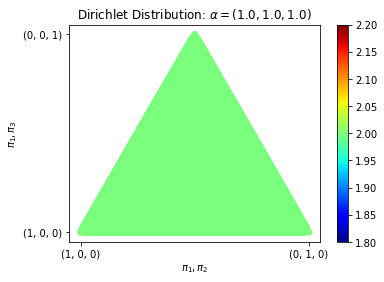

In [84]:
# 2.3.2節節 ディリクレ分布 の図2.8の再現
alpha_k = [1.0, 1.0, 1.0]
plot_gamma(alpha_k)

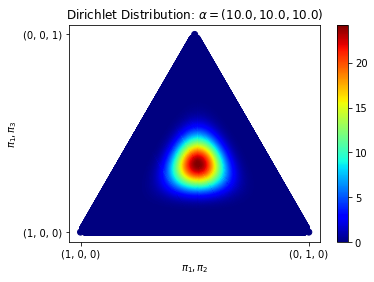

In [85]:
alpha_k = [10.0, 10.0, 10.0]
plot_gamma(alpha_k)

In [86]:
#alpha_k = [0.5, 0.5, 0.5]
#plot_gamma(alpha_k)

## ガウス分布

正規分布は最も良く使われる確率分布です。その詳細は教科書に書かれているので割愛します。ここではscipyによる利用方法にとどめます。

$
\displaystyle P\left( x \| \mu, \sigma \right) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( - \frac{(x-\mu)^2}{2 \sigma^2} \right)
$

利用法
*   SciPy:	scipy.stats.norm($\mu$, $\sigma$)
*   NumPy:	np.random.normal($\mu$, $\sigma$, size=None)
*   Stan:	normal($\mu$, $\sigma$)

In [14]:
from scipy.stats import norm # 正規分布

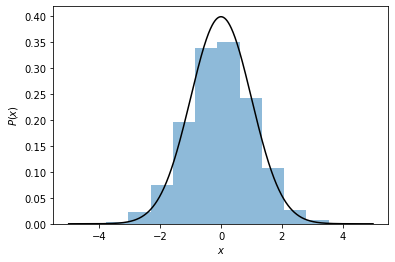

In [87]:
# scipy でPDFを、そして、numpy でデータをランダムサンプリングして、ヒストグラム表示してみます。ちゃんと確率密度関数を再現できていることがわかります。

mu = 0
sigma = 1

x = np.arange(-5, 5, 0.01)
y = norm.pdf(x, mu, sigma) # 平均0標準偏差1を代入
y2 = norm.rvs(mu, sigma, size=1000)

plt.plot(x,y, color="black")
plt.hist(y2, density=True, alpha=0.5) # density で割合に修正していることに注意
plt.xlabel('$x$')
plt.ylabel('$P(x)$')

plt.show()


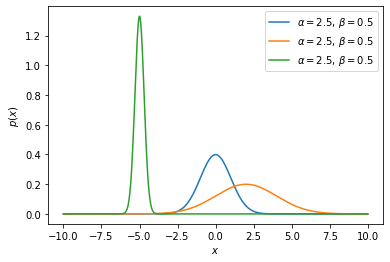

In [47]:
# 教科書 2.3.4 1次元ガウス分布 図2.10の再現
n = 1000
mu_list     = [0.0, 2.0, -5.0]
sigma_list  = [1.0, 2.0, 0.3]

x = np.linspace(-10, 10, n)
for _mu,_sigma in zip(mu_list, sigma_list):
    y = norm.pdf(x, _mu, _sigma)
    plt.plot(x,y,label="$\\alpha=$" + str(_alpha) + ", $\\beta=$" + str(_beta))

plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend()

### 多変量ガウス分布

統計モデリングでは相関関係のある多変数ガウス分布からサンプリングする事があります。

$$ \displaystyle
P(x| \mu, \Sigma) = \frac{1}{\sqrt{(2 \pi)^{k} \det\Sigma}} \exp \left( - \frac{(x-\mu)^{T}\Sigma^{-1}(x-\mu)}{2} \right)
$$

$\Sigma$は共分散行列、$\mu$はそれぞれの確率変数の平均です。2次元以上の場合はベクトルになります。

$\Sigma$を操作することで、変数間の相関を設定すること出来ます。

$$
  \Sigma = \left(
    \begin{array}{cc}
      \sigma_{x_1}^2 & \sigma_{x_1x_2} \\\\
      \sigma_{x_1x_2} & \sigma_{x_2}^2
    \end{array}
  \right)
$$

In [17]:
from scipy.stats import multivariate_normal